In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import os
import re
from matplotlib import pyplot as plt
import seaborn as sns

os.chdir("../")
base_path = os.getcwd()

from machine_learning.mlMethods import *
from machine_learning.mlSupportMethods import *

## 1. Entendimento das variáveis

1.'sinasc-gestacao' - essa variável mostra que tem casos de gestação inicial, verificar como essa base considera diversas
consultas da mesma pessoa.

2.'gest-cs_gestant' - Indica em qual trimestre está a gestação

3.'gest-cs_raca' - 1: branca, 2: preta, 3: amarela, 4: parda e 5: indígena

4.'gest-cs_escol_n' - nível de escolaridade da gestante 

5.'gest-tpevidenci' - Nível de evidência da Sifilis

6.'gest-tpesquema' - Esquema de tratamento de penicilina 

7.'gest-tratparc' - Booleana que indica se o parceiro foi tratado ou não 

8.'gest-tpesqpar' - Esquema de tratamento de penicilina do parceiro

9.'sinasc-sexo' - sexo da criança

10.'sinasc-peso' - peso da criança 

11.'sinasc-apgar1' - teste de vitalidade da criança no primeiro minuto 

12.'sinasc-apgar5' - teste de vitalidade da criança no quinto minuto

13.'sinasc-idademae' - idade da mãe 

14.'sinasc-qtdfilvivo' - quantidade de filhos vivos

15.'sinasc-qtdfilmort'- quantidade de filhos mortos 

16.'sinasc-gestacao' - semana de gestação 1: Menos de 22 semanas, 2: 22 a 27 semanas, 3: 28 a 31 semanas, 4: 32 a 36 semanas, 5: 37 a 41 semanas, 6: 42 semanas e mais.

17.'sinasc-consultas' - quantidade de consultas pré-natal

18.'sinasc-gravidez' - número de bebes na gestação

19.'sinasc-parto' - tipo de parto, se vaginal ou cesáreo 

20.'sinasc-endnasc' - bairro de nascimento

21.'congenita_diagnosis' - diagnóstico de sifilis

22.'gest-sem_diag' - semana do ano em que ocorreu o diagnóstico de sifilis 

## 2. Leitura da Base

In [3]:
categoricos = ['periodo_gestacao', 'etnia_mae', 'nivel_escolaridade', 'cod_unidade_nasc',
               'nivel_sifilis_mae', 'teste_treponemico_mae', 'esquema_tratamento_mae',
               'parceiro_tratado', 'esquema_tratamento_parce', 'sexo_crianca', 'teste_apgar1', 'teste_apgar5',
               'tipo_parto', 'bairro_nascimento']

columns_name = ['idade_mae', 'periodo_gestacao', 'etnia_mae', 'nivel_escolaridade', 'cod_unidade_nasc',
     'nivel_sifilis_mae', 'teste_treponemico_mae', 'esquema_tratamento_mae', 'parceiro_tratado',
     'esquema_tratamento_parce', 'semana_ano_diagnostico', 'sexo_crianca', 'peso_crianca', 'teste_apgar1',
     'teste_apgar5', 'qtdfilho_vivo', 'qtdfilho_mort', 'semana_gestacao', 'numero_consultas',
     'tipo_gravidez', 'tipo_parto', 'bairro_nascimento', 'diagnostico_congenita']


In [4]:
def read_and_get_input_jupyter(columns_name, categoricos):

    def extra_cleaning(df_input_ml):

        df_input_ml['gest-sem_diag'] = df_input_ml['gest-sem_diag'].apply(lambda x: int(str(x)[-2:]))

        df_input_ml = df_input_ml[
            df_input_ml['gest-nu_idade_n'].isin(list(range(4010, 4100)))]

        df_input_ml['gest-nu_idade_n'] = df_input_ml['gest-nu_idade_n'].apply(lambda x: int(x) - 4000)

        df_input_ml['gest-cs_raca'] = df_input_ml['gest-cs_raca'].apply(lambda x: float(str(x).replace("_", "9")))

        df_input_ml['gest-cs_escol_n'] = df_input_ml['gest-cs_escol_n'].apply(
            lambda x: float(str(x).replace("_", "")))

        return df_input_ml

    df_input = pd.read_csv(base_path + '/data_sus/finais/sifilis_match_input_ml_original.csv')

    df_input_ml = df_input[['gest-nu_idade_n', 'gest-cs_gestant', 'gest-cs_raca',
                            'gest-cs_escol_n', 'gest-pre_unipre', 'gest-tpevidenci',
                            'gest-tpteste1', 'gest-tpesquema', 'gest-tratparc',
                            'gest-tpesqpar', 'gest-sem_diag', 'sinasc-sexo',
                            'sinasc-peso', 'sinasc-apgar1', 'sinasc-apgar5',
                            'sinasc-qtdfilvivo', 'sinasc-qtdfilmort', 'sinasc-gestacao',
                            'sinasc-consultas', 'sinasc-gravidez', 'sinasc-parto',
                            'sinasc-bainasc', 'congenita_diagnosis']]

    df_input_ml['ano'] = df_input_ml['gest-sem_diag'].apply(lambda x: int(str(x)[:-2]))
    df_input_ml = df_input_ml[df_input_ml['ano'].isin(list(range(2012, 2018)))]
    # df_input_ml.drop(columns=['ano'], inplace=True)

    df_input_ml = extra_cleaning(df_input_ml)

    df_input_ml = df_input_ml.fillna(method='ffill')

    # Trocando nome das colunas
    columns_update = columns_name.copy()
    columns_update.extend(['ano'])
    df_input_ml.columns = columns_update

    # Dealing with categorical
#     df_input_ml = pd.get_dummies(df_input_ml, columns=categoricos)

    return df_input_ml



df_input_ml = read_and_get_input_jupyter(columns_name, categoricos)



Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [5]:
def read_and_balance_jupyter():

    def balance_the_base(df_input_ml):

        # vai até 17791, separar em 5 grupos de aproximadamente 3558
        df_input_ml_no = df_input_ml[df_input_ml['diagnostico_congenita'] == 0]
        df_input_ml_yes = df_input_ml[df_input_ml['diagnostico_congenita'] == 1]
        df_input_ml_no['id'] = list(range(0, df_input_ml_no.shape[0]))
        bucket = df_input_ml['diagnostico_congenita'].value_counts()[1]

        number_divided = int(df_input_ml['diagnostico_congenita'].value_counts()[0]/ \
                             df_input_ml['diagnostico_congenita'].value_counts()[1])

        bases_dict = dict()
        for i in list(range(0, number_divided+1)):
            if i == number_divided:
                bases_dict[str(i)] = df_input_ml_no.copy()
                bases_dict[str(i)] = bases_dict[str(i)].append(df_input_ml_yes)
            else:
                bases_dict[str(i)] = df_input_ml_no.sample(n=bucket, replace=False)
                bases_dict[str(i)] = bases_dict[str(i)].append(df_input_ml_yes)
                df_input_ml_no = df_input_ml_no[-df_input_ml_no['id'].isin(list(bases_dict[str(i)]['id']))]

        for df in list(bases_dict.keys()):
            bases_dict[df].drop(columns=['id'], inplace=True)

        return bases_dict

    df_input_ml = read_and_get_input(columns_name, categoricos)

    dfs_balanced = balance_the_base(df_input_ml)

    return dfs_balanced

dfs_balanced = read_and_balance_jupyter()
df_input_ml_balanced = dfs_balanced['0']

Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

## 3. Análise Exploratória

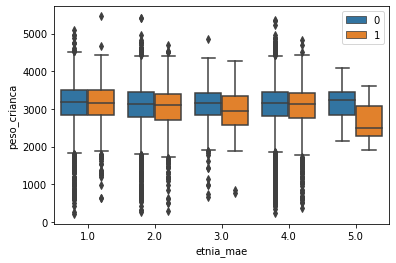

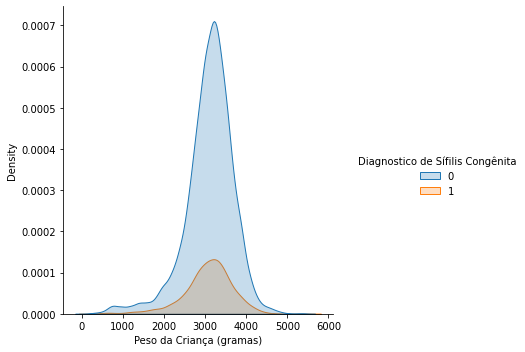

In [6]:
def boxplot_peso_crianca(df_input_ml, c='etnia_mae'):

    aux = df_input_ml[~df_input_ml[c].isna()]
    aux = aux[~aux[c].isin([9, 10, "I"])]
    sns.boxplot(x=c, y='peso_crianca',
                hue='diagnostico_congenita',
                data=aux)
    plt.legend(loc = 'upper right')
    plt.show()

def boxplot_idade_mae(df_input_ml, c='nivel_escolaridade'):
    
    aux = df_input_ml[~df_input_ml[c].isna()]
    aux = aux[~aux[c].isin([9, 10, "I"])]
    sns.boxplot(x=c, y='idade_mae',
                hue='diagnostico_congenita',
                data=aux)
    plt.legend(loc = 'upper right')
    plt.show()


def histograma_peso_crianca(df_input_ml):

    df = df_input_ml[['peso_crianca', 'diagnostico_congenita']]
    df.columns = ['Peso da Criança (gramas)', 'Diagnostico de Sífilis Congênita']

    # sns.displot(x='Peso da Criança (gramas)',
    #             col='Diagnostico de Sífilis Congênita', shrink=1.2, bins=40,
    #             data=df)

    sns.displot(x='Peso da Criança (gramas)', hue='Diagnostico de Sífilis Congênita',
                kind='kde', fill=True,
                data=df)
    plt.show()


def histograma_idade_mae(df_input_ml):

    df = df_input_ml[['idade_mae', 'diagnostico_congenita']]
    df.columns = ['Idade da Mãe', 'Diagnostico de Sífilis Congênita']

    sns.displot(x='Idade da Mãe', hue='Diagnostico de Sífilis Congênita',
                kind='kde', fill=True,
                data=df)

    # sns.displot(x='Idade da Mãe', col='Diagnostico de Sífilis Congênita',
    #             shrink=1.2, bins=40,
    #               data=df)

    plt.show()

boxplot_peso_crianca(df_input_ml)
boxplot_idade_mae(df_input_ml)
histograma_peso_crianca(df_input_ml)
histograma_idade_mae(df_input_ml)

## 3. Treinamento de Modelos e Avaliação de Desempenhos

In [7]:
def apply_cross_validate_jupyter(X_train, y_train, classifier, model_name):

    scoring = {'precision': 'precision',
               'recall': 'recall',
               'f1': 'f1',
               'accuracy': 'accuracy',
               'roc_auc': 'roc_auc'}

    accuracies = cross_validate(estimator=classifier,
                                X=X_train,
                                y=y_train,
                                scoring=scoring,
                                cv=10)
                                 
    return accuracies


def run_xgboost_classifier_jupyter(X_train, y_train):


    parameters = {'colsample_bytree': 0.6, 'gamma': 5, 'min_child_weight': 5,
    'n_estimators': 300, 'subsample': 0.9, 'tree_method': 'auto'}

    classifier = XGBClassifier(min_child_weight=parameters['min_child_weight'],
                               gamma=parameters['gamma'],
                               subsample=parameters['subsample'],
                               colsample_bytree=parameters['colsample_bytree'],
                               n_estimators=parameters['n_estimators'],
                               tree_method=parameters['tree_method'],
                               random_state=0)

    metrics = apply_cross_validate_jupyter(X_train, y_train, classifier, 'xgBoost')

    classifier.fit(X_train, y_train)

    return metrics, classifier


def run_lightGBM_classifier_jupyter(X_train, y_train):

    parameters = {'bagging_fraction': 0.9, 'bagging_freq': 1, 'boosting': 'dart',
                      'feature_fraction': 0.7, 'n_estimators': 500}

    classifier = LGBMClassifier(n_estimators=parameters['n_estimators'],
                                boosting=parameters['boosting'],
                                bagging_freq=parameters['bagging_freq'],
                                feature_fraction=parameters['feature_fraction'],
                                random_state=0)

    metrics = apply_cross_validate_jupyter(X_train, y_train, classifier, 'lightGBM')

    classifier.fit(X_train, y_train)

    return metrics, classifier


def run_extratree_classifier_jupyter(X_train, y_train):


    parameters = {'class_weight': {0: 1, 1: 1.3}, 'criterion': 'entropy', 'max_leaf_nodes': 100,
                          'min_samples_split': 50, 'n_estimators': 200, 'warm_start': True}

    classifier = ExtraTreesClassifier(criterion=parameters['criterion'],
                                        n_estimators=parameters['n_estimators'],
                                        max_leaf_nodes=parameters['max_leaf_nodes'],
                                        min_samples_split=parameters['min_samples_split'],
                                        bootstrap=True,
                                        class_weight={0: 1, 1: 1.3},
                                        random_state=0)
    classifier.fit(X_train, y_train)
    metrics = apply_cross_validate_jupyter(X_train, y_train, classifier, 'extraTree')

    return metrics, classifier


def run_random_classifier_jupyter(X_train, y_train, grid_search=False):


    parameters = {'class_weight': {0: 1, 1: 1.3}, 'criterion': 'gini', 'max_leaf_nodes': 500,
                          'min_samples_split': 50, 'n_estimators': 200, 'warm_start': True}

    classifier = RandomForestClassifier(criterion=parameters['criterion'],
                                        n_estimators=parameters['n_estimators'],
                                        max_leaf_nodes=parameters['max_leaf_nodes'],
                                        min_samples_split=parameters['min_samples_split'],
                                        bootstrap=True,
                                        class_weight={0: 1, 1: 1.3},
                                        random_state=0)

    metrics = apply_cross_validate_jupyter(X_train, y_train, classifier, 'randomForest')

    classifier.fit(X_train, y_train)

    return metrics, classifier


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

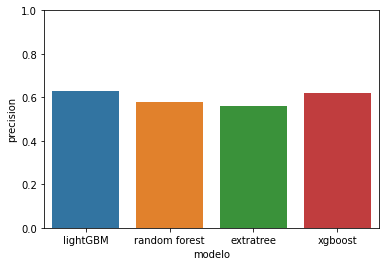

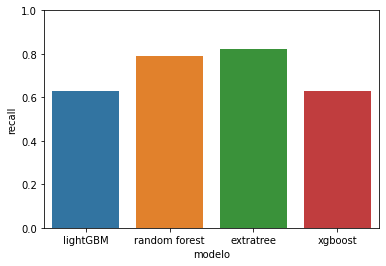

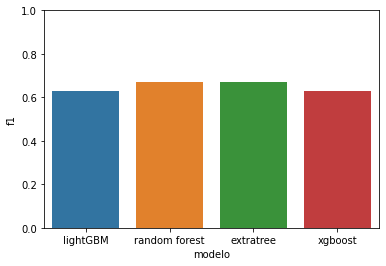

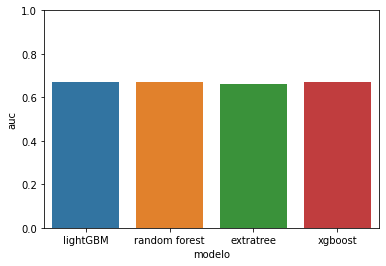

In [9]:
def avalia_modelos(df_input_ml):

    df_input = df_input_ml.drop(columns=['ano'])

    df_input_ml_X = df_input.drop(columns=['diagnostico_congenita'])
    df_input_ml_y = df_input['diagnostico_congenita']

    X_train, X_test, y_train, y_test = train_test_split(df_input_ml_X,
                                                            df_input_ml_y,
                                                            test_size=0.2,
                                                            random_state=1)

    accuracies_lightGBM, classifier_lightGBM = run_lightGBM_classifier_jupyter(X_train, y_train)
    accuracies_random, classifier_random = run_random_classifier_jupyter(X_train, y_train)
    accuracies_extratree, classifier_extratree = run_extratree_classifier_jupyter(X_train, y_train)
    accuracies_xgboost, classifier_xgboost = run_xgboost_classifier_jupyter(X_train, y_train)

    df_accuracies = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1", "auc", "modelo"])


    df_accuracies = df_accuracies.append(pd.DataFrame([[round(accuracies_lightGBM['test_accuracy'].mean(), 2),
                                                       round(accuracies_lightGBM['test_precision'].mean(), 2),
                                                       round(accuracies_lightGBM['test_recall'].mean(), 2),
                                                       round(accuracies_lightGBM['test_f1'].mean(), 2),
                                                       round(accuracies_lightGBM['test_roc_auc'].mean(), 2),
                                                      "lightGBM"]], 
                                                      columns=["accuracy", "precision", "recall", "f1", "auc", "modelo"]))

    df_accuracies = df_accuracies.append(pd.DataFrame([[round(accuracies_random['test_accuracy'].mean(), 2),
                                                       round(accuracies_random['test_precision'].mean(), 2),
                                                       round(accuracies_random['test_recall'].mean(), 2),
                                                       round(accuracies_random['test_f1'].mean(), 2),
                                                       round(accuracies_random['test_roc_auc'].mean(), 2),
                                                       "random forest"]], 
                                                      columns=["accuracy", "precision", "recall", "f1", "auc", "modelo"]))

    df_accuracies = df_accuracies.append(pd.DataFrame([[round(accuracies_extratree['test_accuracy'].mean(), 2),
                                                       round(accuracies_extratree['test_precision'].mean(), 2),
                                                       round(accuracies_extratree['test_recall'].mean(), 2),
                                                       round(accuracies_extratree['test_f1'].mean(), 2),
                                                       round(accuracies_extratree['test_roc_auc'].mean(), 2),
                                                       "extratree"]], 
                                                      columns=["accuracy", "precision", "recall", "f1", "auc", "modelo"]))

    df_accuracies = df_accuracies.append(pd.DataFrame([[round(accuracies_xgboost['test_accuracy'].mean(), 2),
                                                       round(accuracies_xgboost['test_precision'].mean(), 2),
                                                       round(accuracies_xgboost['test_recall'].mean(), 2),
                                                       round(accuracies_xgboost['test_f1'].mean(), 2),
                                                       round(accuracies_xgboost['test_roc_auc'].mean(), 2),
                                                       "xgboost"]], 
                                                      columns=["accuracy", "precision", "recall", "f1", "auc", "modelo"]))

    df_accuracies.to_csv(base_path+"/data_sus/finais/avaliacao_metricas_modelos.csv")


avalia_modelos(df_input_ml_balanced)    
    
df_accuracies = pd.read_csv(base_path+"/data_sus/finais/avaliacao_metricas_modelos.csv")

df_accuracies.drop(columns=["Unnamed: 0"], inplace=True)

for c in list(df_accuracies.columns):
    
    if not c == "modelo":
        sns.barplot(
            data=df_accuracies, x="modelo", y=c)
        plt.ylim((0,1))
        plt.show()

## 4. Análise da Importância das Variáveis

In [ ]:
def apply_shap_values(X_train, classifier, m):

    if m in ['random_classifier', 'extratree_classifier',
             'lightGBM_classifier', 'xgboost_classifier']:
        explainer = shap.TreeExplainer(classifier)
        shap_values = explainer.shap_values(X_train, check_additivity=False)
    elif m in ['svm_rbf', 'knn', 'svm_linear']:
        explainer = shap.KernelExplainer(classifier.predict_proba, X_train, link="logit")
        shap_values = explainer.shap_values(X_train, nsamples=5)
    elif m in ['logistic_regression']:
        explainer = shap.LinearExplainer(classifier, X_train, feature_dependence="independent")
        shap_values = explainer.shap_values(X_train)

    if m in ['random_classifier', 'extratree_classifier', 'lightGBM_classifier']:
        df_shap_values_1 = pd.DataFrame(shap_values[1], columns=list(X_train.columns))
    else:
        df_shap_values_1 = pd.DataFrame(shap_values, columns=list(X_train.columns))

    list_importance = list()
    
    for c in list(df_shap_values_1.columns):
        df_shap_values_1[c] = df_shap_values_1[c].apply(lambda x: abs(x))
        list_importance.append(np.mean(df_shap_values_1[c]))
        
    df_feature_importance = pd.DataFrame(columns=["feature", "importance"])
    df_feature_importance["feature"] = list(X_train.columns)
    df_feature_importance["importance"] = list_importance
    df_feature_importance.sort_values(by=["importance"], inplace=True, ascending=False)

    df_feature_importance.to_csv(base_path + "/data_sus/finais/feature_importance_{}.csv".format(m))

    shap_values_1 = shap_values[1]
    shap.summary_plot(shap_values_1, X_train, plot_type="bar")

    return df_feature_importance

Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


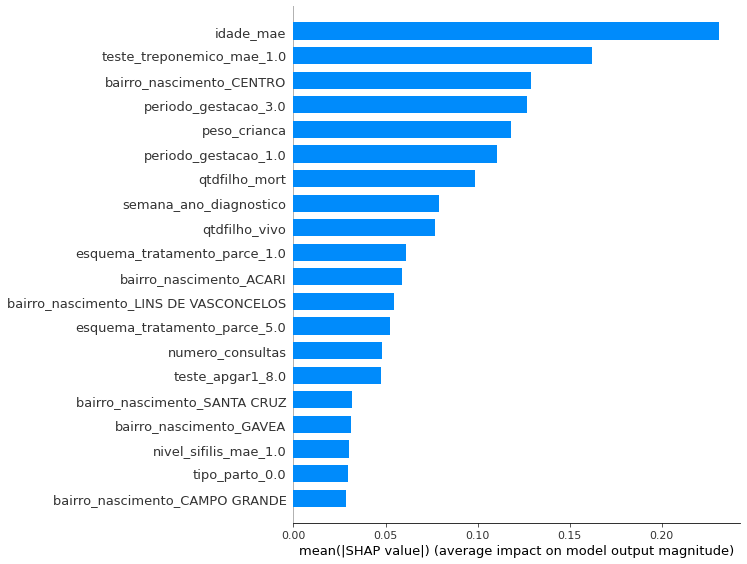

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current va

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [17]:
def read_and_balance():

    def balance_the_base(df_input_ml):

        # vai até 17791, separar em 5 grupos de aproximadamente 3558
        df_input_ml_no = df_input_ml[df_input_ml['diagnostico_congenita'] == 0]
        df_input_ml_yes = df_input_ml[df_input_ml['diagnostico_congenita'] == 1]
        df_input_ml_no['id'] = list(range(0, df_input_ml_no.shape[0]))
        bucket = df_input_ml['diagnostico_congenita'].value_counts()[1]

        number_divided = int(df_input_ml['diagnostico_congenita'].value_counts()[0]/ \
                             df_input_ml['diagnostico_congenita'].value_counts()[1])

        bases_dict = dict()
        for i in list(range(0, number_divided+1)):
            if i == number_divided:
                bases_dict[str(i)] = df_input_ml_no.copy()
                bases_dict[str(i)] = bases_dict[str(i)].append(df_input_ml_yes)
            else:
                bases_dict[str(i)] = df_input_ml_no.sample(n=bucket, replace=False)
                bases_dict[str(i)] = bases_dict[str(i)].append(df_input_ml_yes)
                df_input_ml_no = df_input_ml_no[-df_input_ml_no['id'].isin(list(bases_dict[str(i)]['id']))]

        for df in list(bases_dict.keys()):
            bases_dict[df].drop(columns=['id'], inplace=True)

        return bases_dict

    df_input_ml = read_and_get_input(columns_name, categoricos)

    dfs_balanced = balance_the_base(df_input_ml)

    return dfs_balanced

def take_train_and_test(dfs_balanced):

    df_input_ml = dfs_balanced['0'].copy()
    df_input_ml.drop(columns=['ano'], inplace=True)

    df_input_ml_X = df_input_ml.drop(columns=['diagnostico_congenita'])
    df_input_ml_y = df_input_ml['diagnostico_congenita']

    X_train, X_test, y_train, y_test = train_test_split(df_input_ml_X,
                                                        df_input_ml_y,
                                                        test_size=0.2,
                                                        random_state=1)

    return X_train, y_train


def looking_for_best_features(m):

    dfs_balanced = read_and_balance()

    X_train, y_train = take_train_and_test(dfs_balanced)

    columns_result = ['Modelo', 'Valor Metrica', 'Quantidade de Variaveis', 'Metrica']

    df_results = pd.DataFrame(columns=columns_result)

    auc, classifier = run_lightGBM_classifier_jupyter(X_train, y_train)
    
    df_features = apply_shap_values(X_train, classifier, m)

    X_train_copy = X_train.copy()

    i = 1

    while i <= 50:

        X_train = X_train_copy.loc[:, list(df_features['feature'])[:i*10]]

        auc, classifier = run_lightGBM_classifier_jupyter(X_train, y_train)

        aux = pd.DataFrame([[m, auc['test_roc_auc'], X_train.shape[1], "AUC"],
                           [m, auc['test_f1'], X_train.shape[1], "F1-Score"]], columns=columns_result)

        df_results = df_results.append(aux)

        i += 1

    return df_results

df = looking_for_best_features('lightGBM_classifier')
df.to_csv(base_path+"/data_sus/finais/analise_variaveis/auc_qtd_features/auc_qtd_features_lightGBM_classifier.csv")

In [ ]:
df_desempenho_variaveis = pd.read_csv(base_path+"/data_sus/finais/analise_variaveis/feature_importance_lightGBM_classifier.csv")

f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    data=df_desempenho_variaveis, x='Quantidade de Variaveis', y='Valor Metrica', hue='Metrica')
plt.show()

In [ ]:
df_feature_importance = pd.read_csv(base_path+"/data_sus/finais/analise_variaveis/feature_importance_lightGBM_classifier.csv")
df_feature_importance.drop(columns=["Unnamed: 0"], inplace=True)
df_feature_importance = df_feature_importance.iloc[:50,:]

f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    data=df_feature_importance, x='importance', y='feature')
plt.show()